# Boston Houses Dataset
- Exploratory Analysis

In [46]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [47]:
from sklearn.datasets import fetch_california_housing
calif = fetch_california_housing()

In [48]:
# boston= load_boston()

x= calif.data
y=calif.target


In [49]:
print(x.shape)
print(y.shape)


(20640, 8)
(20640,)


In [50]:
print(calif.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [51]:
import pandas as pd
import numpy as np

In [52]:
df= pd.DataFrame(x)
df.columns= calif.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [53]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [54]:
# Normilise this dataset
# Each feature must have 0 mean, unit variance
u= np.mean(x,axis=0)
std= np.std(x,axis=0)
print(u.shape,std.shape)


(8,) (8,)


In [55]:
# Normalise the data
x=(x-u)/std

In [56]:
print(pd.DataFrame(x[:5,:]).head())

          0         1         2         3         4         5         6  \
0  2.344766  0.982143  0.628559 -0.153758 -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041 -0.263336  0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620 -0.049016 -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966 -0.049833 -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711 -0.032906 -0.759847 -0.085616  1.038503   

          7  
0 -1.327835  
1 -1.322844  
2 -1.332827  
3 -1.337818  
4 -1.337818  


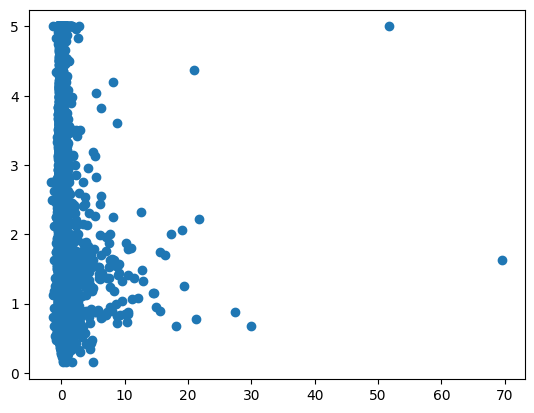

In [57]:
# Plot y vs any features
import matplotlib.pyplot as plt
plt.scatter(x[:,3],y)
plt.show()

In [58]:
ones= np.ones((x.shape[0],1))
x= np.hstack((ones,x))
# np.hstack?


In [59]:
X=x
x[:4,:4]
print(x.shape[0])
x[0].shape

20640


(9,)

In [124]:
# X - matrix (m x n)
# x - vector (single example with n features)

def hypothesis(x,theta):
    y_=0.0
    n=x.shape[0] # features
    for i in range(n):
        y_ +=(theta[i]*x[i]) # x1*theta1+ x2*theta2+ ........
    return y_
def error(X,y,theta):
    e= 0.0
    m=X.shape[0] #examples
    
    for i in range(m):
        y_= hypothesis(X[i],theta)
        e+= (y[i]-y_)**2 # error for ith example
    
    return e/m

def gradient(X,y,theta):
    m,n= X.shape
    
    grad= np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        # sum over all examples
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-y[i])*X[i][j]
    
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list= []
    
    for i in range(max_epochs):
        e=error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad=gradient(X,y,theta)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
            
    return theta,error_list



In [133]:
# pd.DataFrame(X)

In [129]:
import time
start =time.time()
theta,error_list= gradient_descent(X,y)
end=time.time()
print("Time taken is ", end-start)


Time taken is  168.3764989376068


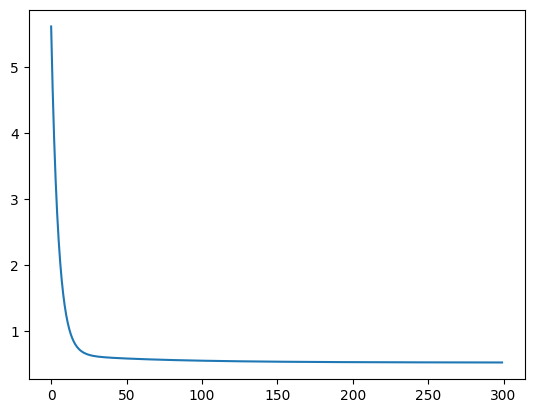

In [119]:
plt.plot(error_list)
plt.show()

In [143]:
# print(theta)

In [108]:
y_= []
m,n=X.shape
for i in range(m):
    pred=hypothesis(X[i],theta)
    y_.append(pred)
y_=np.array(y_)


In [135]:
def r2_score(y,y_):
    num= np.sum((y-y_)**2)
    denom= np.sum((y-y.mean())**2)
    score= (1-num/denom)
    return score*100

In [139]:
r2_score(y,y_)

60.49796286837969

### Section- Optimising Code using vectorisation

In [154]:
# X - matrix (m x n)
# x - vector (single example with n features)

def hypothesis(x,theta):
    return np.dot(x,theta) # x1*theta1+ x2*theta2+ ........

def error(X,y,theta):
    e= 0.0
    m=X.shape[0] #examples
    
    y_=hypothesis(X,theta)
    e=np.sum((y-y_)**2)# error for ith example
    
    return e/m

def gradient(X,y,theta):
    m,n= X.shape
    y_=hypothesis(X,theta)
    grad= np.dot(X.T,(y_-y))
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list= []
    
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
            
    return theta,error_list



In [172]:
import time
start =time.time()
theta,error_list= gradient_descent(X,y)
end=time.time()
print("Time taken is ", end-start)

Time taken is  0.11049604415893555


In [155]:
r2_score(y,y_)

60.49796286837969

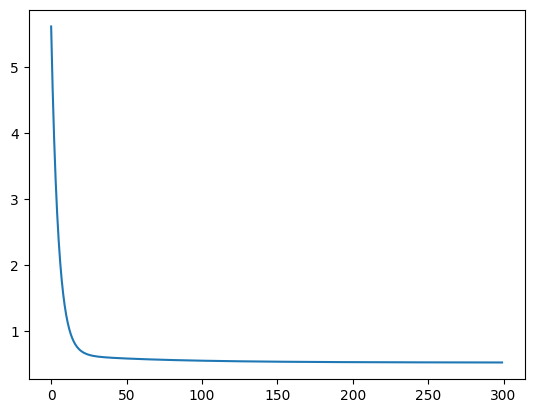

In [156]:
plt.plot(error_list)
plt.show()